<a href="https://colab.research.google.com/github/ManaviSh/transitfeed/blob/master/learn_gtfs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
futar = pd.read_csv('/content/vfl_data.csv', encoding='cp1250')
print(len(futar))
futar.head()

636064


,Unnamed: 0,bearing,congestionLevel,deviated,label,lastUpdateTime,licensePlate,location,model,routeId,serviceDate,status,stopDistancePercent,stopId,stopSequence,tripId,vehicleId,vehicleRouteType
0,0,335.0,NaN,False,Boráros tér H,1539671351,LOV870,"{'lat': 47.44018, 'lon': 19.09628}",VanHool AG318 csuklós autóbusz,BKK_0235,20181016.0,IN_TRANSIT_TO,11.0,BKK_F01440,8.0,BKK_B86621139,BKK_3662,BUS
1,1,206.0,NaN,False,Városház tér,1539671354,V1440,"{'lat': 47.483326, 'lon': 19.053127}",Ganz csuklós,BKK_3470,20181016.0,STOPPED_AT,100.0,BKK_008590,4.0,BKK_B84762130,BKK_4510,TRAM
2,2,236.0,NaN,False,Etele út / Fehérvári út,1539671350,V2112,"{'lat': 47.469288, 'lon': 19.082859}",CAF 9 modulos szerelvény,BKK_3010,20181016.0,IN_TRANSIT_TO,8.0,BKK_008155,23.0,BKK_B87857385,BKK_5840,TRAM
3,3,185.0,NaN,False,Városház tér,1539671351,V4334,"{'lat': 47.443512, 'lon': 19.036741}",Tátra T5C5K,BKK_3560,20181016.0,STOPPED_AT,100.0,BKK_F02025,31.0,BKK_B863972542,BKK_4993,TRAM
4,4,9.0,NaN,False,Bécsi út / Vörösvári út,1539671367,V1442,"{'lat': 47.520626, 'lon': 19.036764}",Ganz csuklós,BKK_3190,20181016.0,STOPPED_AT,100.0,BKK_F00241,16.0,BKK_B840272638,BKK_4512,TRAM


In [19]:
lat_lon_df = futar.location.str.split(",", expand=True)
lats = lat_lon_df[0].str.replace("{'lat': ", "").astype(np.float64)
lons = lat_lon_df[1].str.replace(" 'lon': ", "").str.replace('}', '').astype(np.float64)

x_coords, y_coords = lnglat_to_meters(lons, lats)
gps_data = pd.DataFrame({'coord_x': x_coords, 'coord_y': y_coords})
gps_data.head()

,coord_x,coord_y
0,2.125788e+06,6.014221e+06
1,2.120984e+06,6.021325e+06
2,2.124294e+06,6.019013e+06
3,2.119160e+06,6.014769e+06
4,2.119163e+06,6.027471e+06


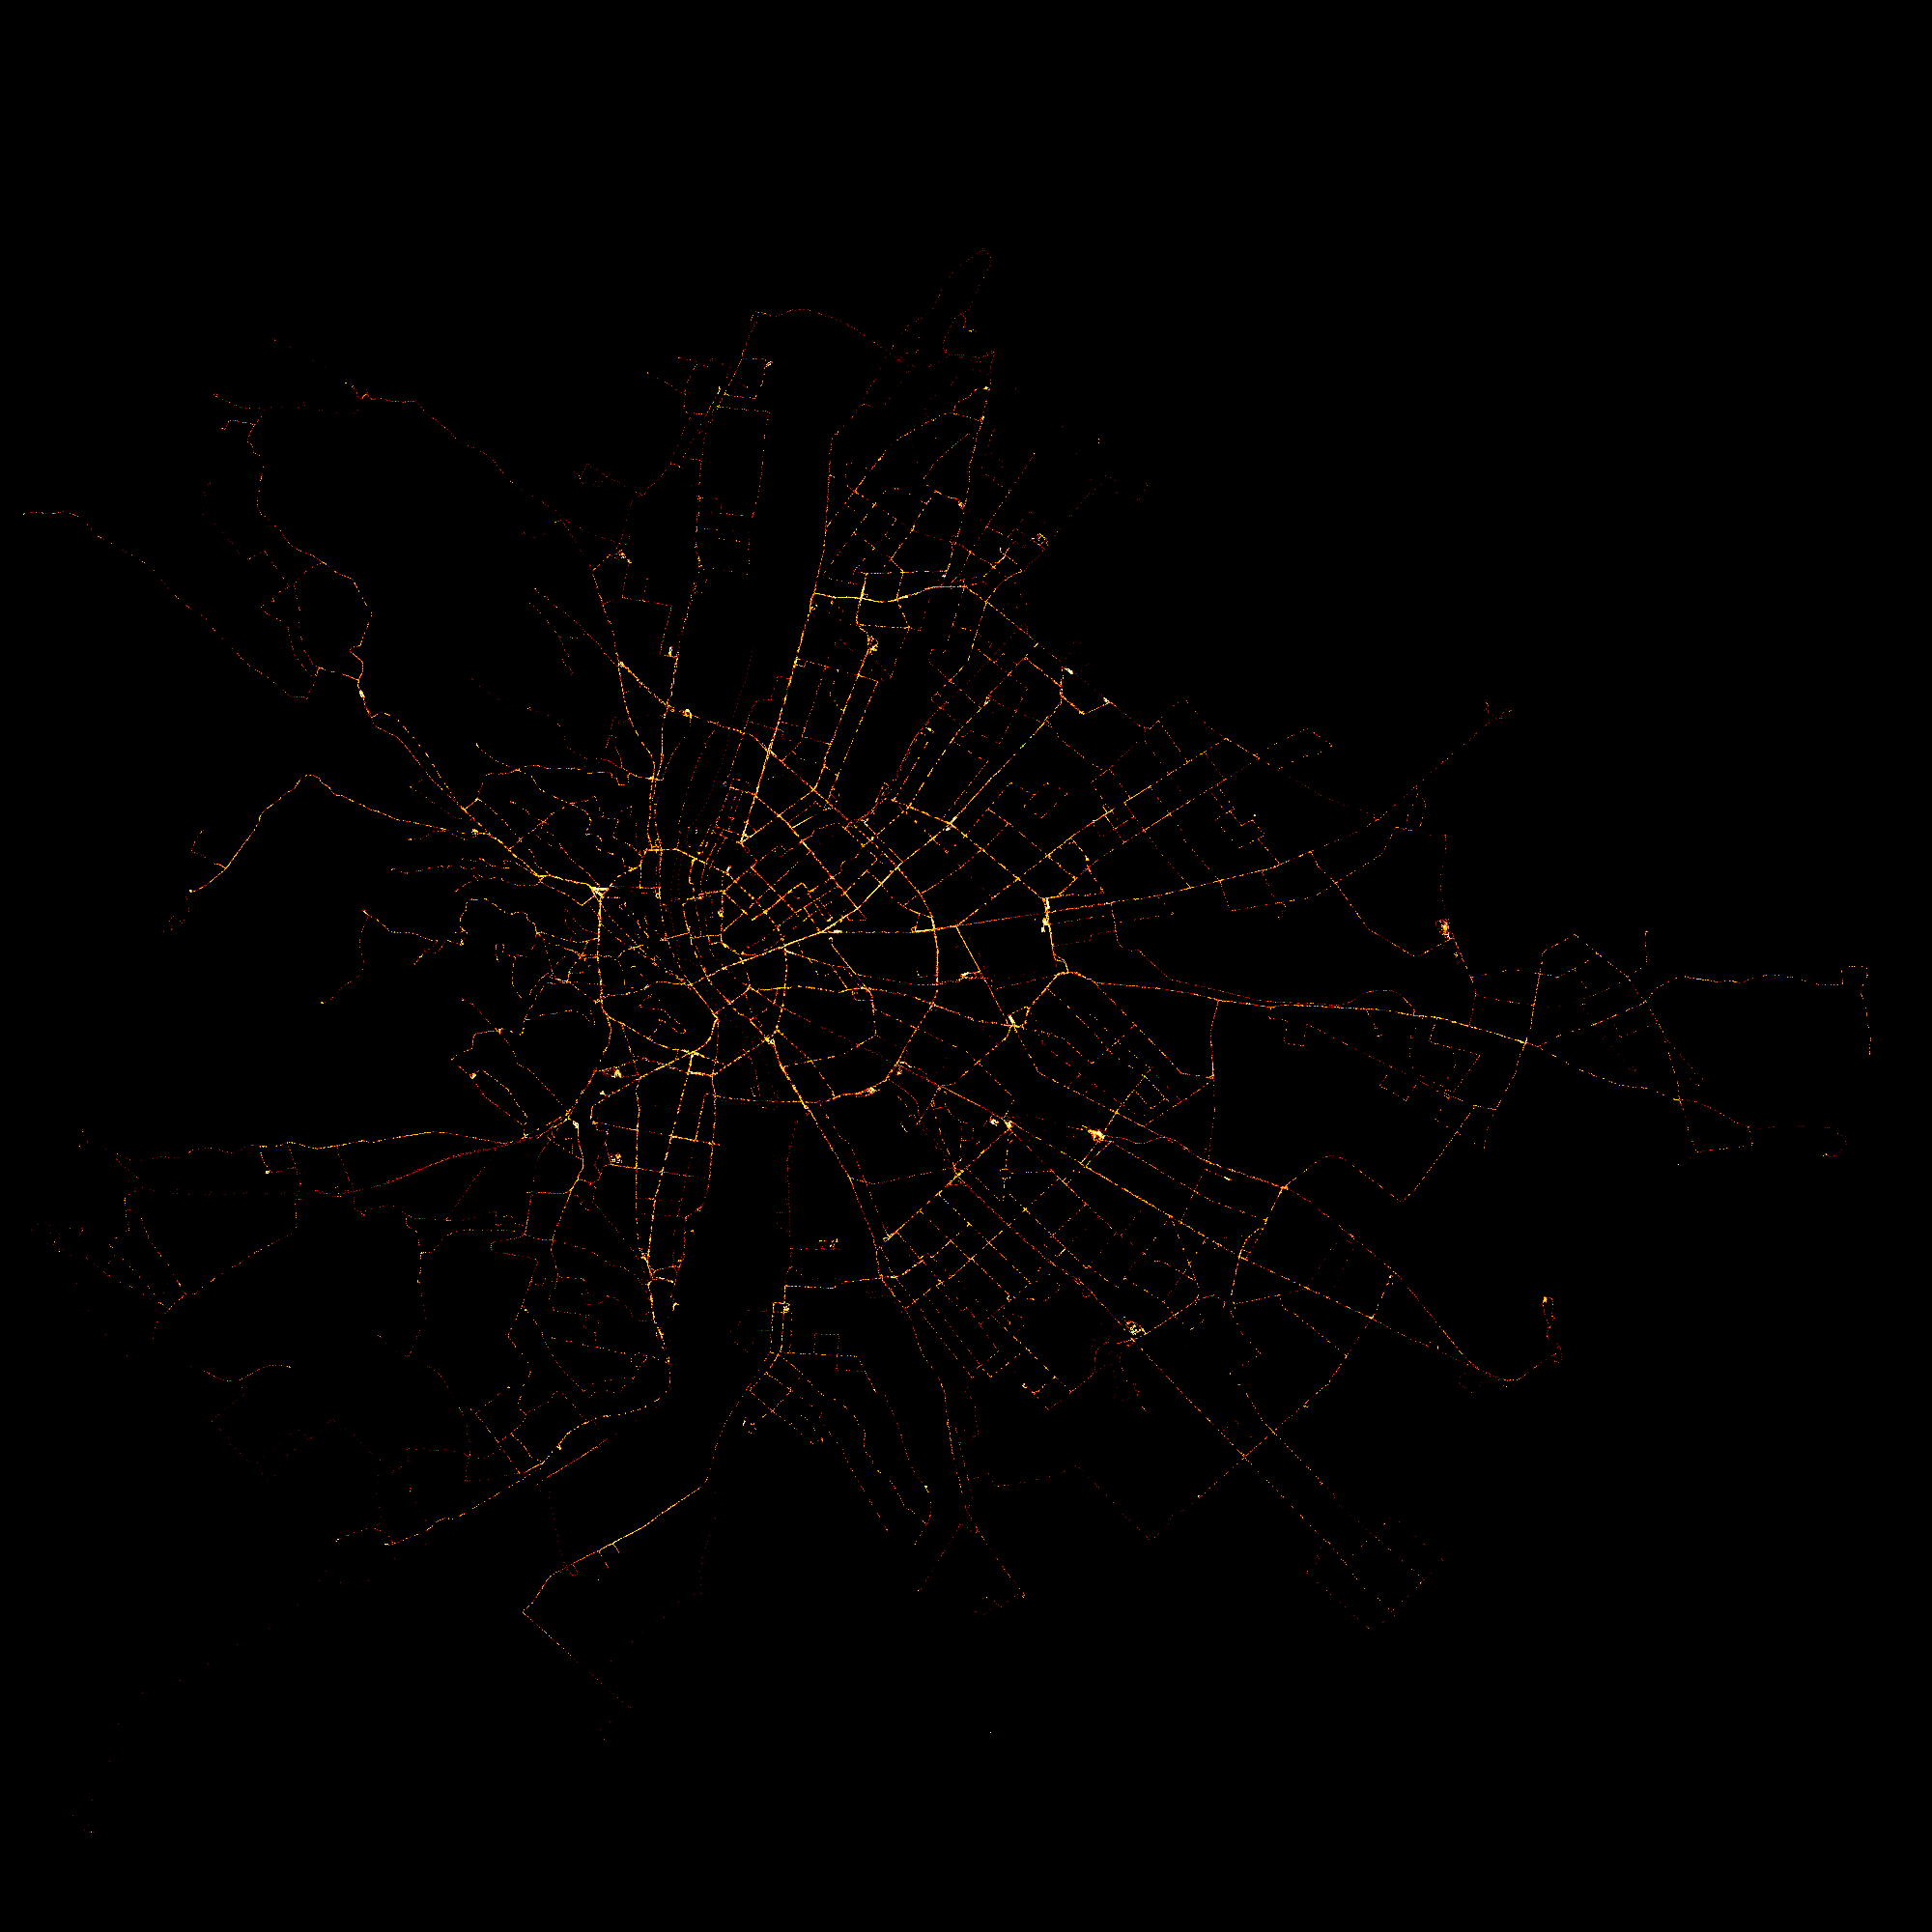

In [20]:
p = bp.figure(tools='pan,wheel_zoom,reset',
              plot_width=int(600),
              plot_height=int(600),
              x_range=x_range,
              y_range=y_range)
              
p.axis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

url = "https://cartodb-basemaps-b.global.ssl.fastly.net/dark_all/{z}/{x}/{y}.png"
tile_renderer = p.add_tile(WMTSTileSource(url=url))
tile_renderer.alpha = 1

def image_callback(x_range, y_range, w, h, color_fn=tf.shade):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(gps_data, 'coord_x', 'coord_y', agg=ds.count())
    image = tf.shade(agg, cmap=cc.fire, how='eq_hist')
    return tf.dynspread(image, threshold=0.1, max_px=20)

export_image(image_callback(x_range=x_range, y_range=y_range, w=2000, h=2000),
             filename="BUD_gps_fire", background='black')